In [1]:
# Set paths (Currently, need to run this cell every ipynb file...)
# You can add these paths to PYTHONPATH in .zshrc/.zprofile (.bashrc/.bash_profile)
# PYTHONPATH='/Users/masunaga/work/python_git/lib_open/projects/Hisaki_py:$PYTHONPATH'
# export PYTHONPATH

import sys
# Revise the path as nessesary for your environment
hskpypath = '/Users/tsuch/VSCode/python/Hisaki/Hisaki_Py/'
if hskpypath not in sys.path:
    sys.path.append(hskpypath)

# Revise the path as nessesary for your environment
mypypath = '/Users/tsuch/VSCode/python/Hisaki/'
if mypypath not in sys.path:
    sys.path.append(mypypath)


In [2]:
import hskinit  ## Run hskinit

# Download data

In [3]:
from hskpy.general.data import download_data_l2p, get_fname

In [4]:
date_in='20141215'
download_data_l2p('jupiter', date_in, vr='01_00')


OK: http://octave.gp.tohoku.ac.jp/db/HISAKI/l2prime/jupiter/jupiter/2014/exeuv_jupiter_20141215_lv02p_LT00-24_dt00106_vr01_00.fits
File exeuv_jupiter_20141215_lv02p_LT00-24_dt00106_vr01_00.fits is downloading to the local computer.


# Find data

In [5]:
fname = get_fname('jupiter', date_in, lv='l2p', vr='01_00', fullpath=True)
fname

'/Users/Shared/data/hisaki/l2prime/jupiter/jupiter/2014/exeuv_jupiter_20141215_lv02p_LT00-24_dt00106_vr01_00.fits'

In [6]:
from hskpy.general.data import fitsopen, get_img, get_xaxis, get_yaxis, get_labels

In [7]:
hdul = fitsopen(fname)
n_ext=1

---- Opened exeuv_jupiter_20141215_lv02p_LT00-24_dt00106_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----


In [8]:
hdul[n_ext].header

EXTENSION=                     / compiled at Feb  5 2020 07:57:15 (JST)          [astropy.io.fits.card]
 [astropy.io.fits.verify]


XTENSION= 'IMAGE   '           /Type of extension                               
BITPIX  =                  -32 /number of bits per data pixel                   
NAXIS   =                    2 /number of data axis                             
NAXIS1  =                 1024 /number of data axis1                            
NAXIS2  =                 1024 /number of data axis2                            
PCOUNT  =                    0 / number of parameters per group                 
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'Total   '           /Name of this HDU                                
EXTVER  =                    0 / version of the extension                       
DATE    = '2022-12-04T09:27:15' / Date of file creation (UTC)                   
ORIGIN  = 'ISAS/JAXA'          / Data origin                                    
TELESCOP= 'SPRINT-A'           / Telescope name                                 
SPCECRFT= 'SPRINT-A'        

In [9]:
img = get_img(hdul, ext=n_ext)

# Get x and y axes and labels

In [10]:
x_axis = get_xaxis(hdul, ext=n_ext)
y_axis = get_yaxis(hdul, ext=n_ext)
x_label, y_label, BUNITS = get_labels(hdul, ext=n_ext)

x_axis, y_axis, BUNITS

(array([1515., 1514., 1513., ...,  494.,  493.,  492.]),
 array([-2432.25, -2428.02, -2423.79, ...,  1886.58,  1890.81,  1895.04]),
 'counts/pixel')

Plot 2D spectrograph image

Text(0, 0.5, 'arcsec')

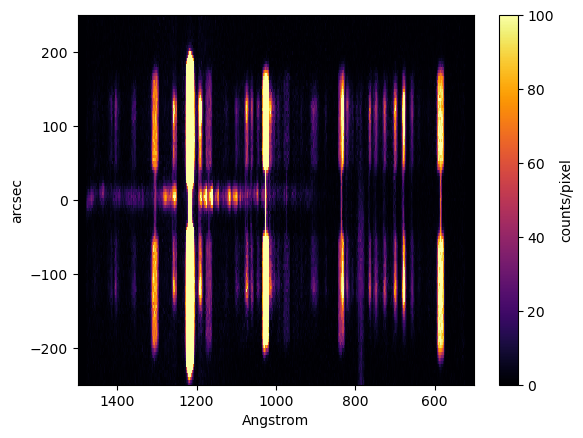

In [11]:
import matplotlib.pyplot as plt  # import pyplot module

mesh = plt.pcolormesh(x_axis, y_axis, img,
                      cmap='inferno', vmin=0.0, vmax=100.0)
plt.colorbar(mesh, label=BUNITS)
plt.xlim(1500.0, 500.0)  # set xrange (in wavelength)
plt.ylim(-250.0, 250.0)  # set yrange (in bin num)
plt.xlabel(x_label)
plt.ylabel(y_label)

Text(0.5, 1.0, 'Total / Integration time=468min')

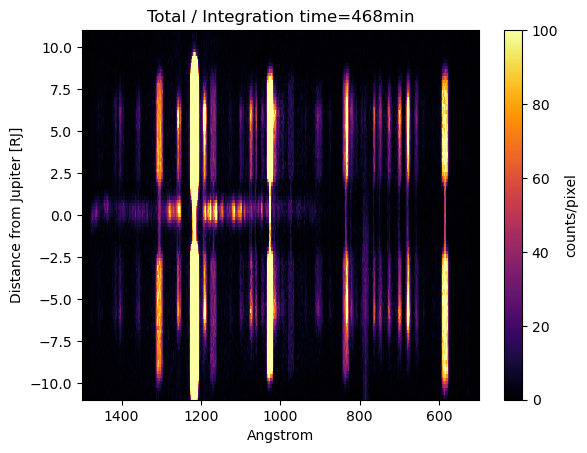

In [12]:
EXTNAME = hdul[n_ext].header['EXTNAME']
INT_TIME = hdul[n_ext].header['INT_TIME']
label = EXTNAME + ' / Integration time='+str(INT_TIME)+'min'
APPDIA = float(hdul[n_ext].header['APPDIA'])
y_axis_rj = y_axis / (APPDIA * 0.5)

mesh = plt.pcolormesh(x_axis, y_axis_rj, img,
                      cmap='inferno', vmin=0.0, vmax=100.0)
plt.colorbar(mesh, label=BUNITS)
plt.xlim(1500.0, 500.0)  # set xrange (in wavelength)
plt.ylim(-11.0, 11.0)  # set yrange (in Jovian radii)
plt.xlabel(x_label)
plt.ylabel('Distance from Jupiter [RJ]')
plt.title(label)


Plot x slice (spectrum)

Text(0.5, 1.0, 'Spatial range: from 6.0 to 7.0 [RJ]')

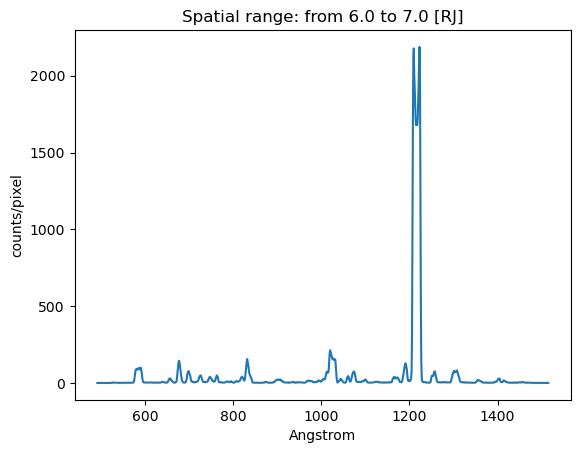

In [13]:
import numpy as np
# import plotting functions from data module
from hskpy.general.data import get_xslice

xprof_range = [6.0, 7.0]
index = np.int_(
    np.where((y_axis_rj > xprof_range[0]) & (y_axis_rj < xprof_range[1])))[0]
xprof = get_xslice(img, ylim=[index[0], index[-1]], mean=True)

fig, ax = plt.subplots(1, 1)
ax.plot(x_axis, xprof)

ax.set_xlabel(x_label)
ax.set_ylabel(BUNITS)

label = 'Spatial range: from ' + \
    str(xprof_range[0])+' to '+str(xprof_range[1])+' [RJ]'
ax.set_title(label)


Plot y slice (spatial distribution)

Text(0.5, 1.0, 'Spectral range: from 670.0 to 680.0 [A]')

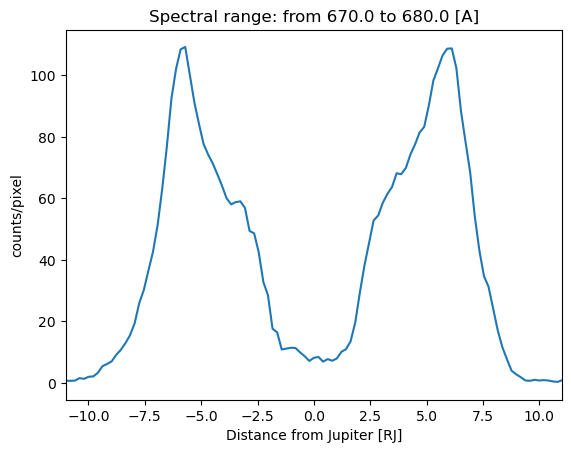

In [14]:
# import plotting functions from data module
from hskpy.general.data import get_yslice

yprof_range = [670.0, 680.0]
index = np.int_(
    np.where((x_axis > yprof_range[0]) & (x_axis < yprof_range[1])))[0]
yprof = get_yslice(img, xlim=[index[0], index[-1]], mean=True)

fig, ax = plt.subplots(1, 1)
ax.plot(y_axis_rj, yprof)

ax.set_xlabel('Distance from Jupiter [RJ]')
ax.set_ylabel(BUNITS)
ax.set_xlim(-11.0, 11.0)

label = 'Spectral range: from '+str(yprof_range[0])+' to '+str(yprof_range[1])+' [A]'
ax.set_title(label)

In [15]:
hdul.close()

Image integration

In [16]:
import datetime as dt

# start date
start_date = (2015,1,1)
# number of day from the start date
n_day = 31
#fits version
fits_ver = '01_00'

# download data
proc_date = dt.date(start_date[0], start_date[1], start_date[2])
date_list = []
for i in range(n_day):
    date_str = proc_date.strftime('%Y%m%d')
    print(date_str)
    download_data_l2p('jupiter', date_str, vr=fits_ver)
    date_list.append(date_str)
    proc_date += dt.timedelta(days=1)


20150101
OK: http://octave.gp.tohoku.ac.jp/db/HISAKI/l2prime/jupiter/jupiter/2015/exeuv_jupiter_20150101_lv02p_LT00-24_dt00106_vr01_00.fits
File exeuv_jupiter_20150101_lv02p_LT00-24_dt00106_vr01_00.fits is downloading to the local computer.
20150102
OK: http://octave.gp.tohoku.ac.jp/db/HISAKI/l2prime/jupiter/jupiter/2015/exeuv_jupiter_20150102_lv02p_LT00-24_dt00106_vr01_00.fits
File exeuv_jupiter_20150102_lv02p_LT00-24_dt00106_vr01_00.fits is downloading to the local computer.
20150103
OK: http://octave.gp.tohoku.ac.jp/db/HISAKI/l2prime/jupiter/jupiter/2015/exeuv_jupiter_20150103_lv02p_LT00-24_dt00106_vr01_00.fits
File exeuv_jupiter_20150103_lv02p_LT00-24_dt00106_vr01_00.fits is downloading to the local computer.
20150104
OK: http://octave.gp.tohoku.ac.jp/db/HISAKI/l2prime/jupiter/jupiter/2015/exeuv_jupiter_20150104_lv02p_LT00-24_dt00106_vr01_00.fits
File exeuv_jupiter_20150104_lv02p_LT00-24_dt00106_vr01_00.fits is downloading to the local computer.
20150105
OK: http://octave.gp.tohoku

---- Opened exeuv_jupiter_20150101_lv02p_LT00-24_dt00106_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----
---- Opened exeuv_jupiter_20150102_lv02p_LT00-24_dt00106_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----
---- Opened exeuv_jupiter_20150103_lv02p_LT00-24_dt00106_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----
---- Opened exeuv_jupiter_20150104_lv02p_LT00-24_dt00106_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----
---- Opened exeuv_jupiter_20150105_lv02p_LT00-24_dt00106_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----
---- Opened exeuv_jupiter_20150106_lv02p_LT00-24_dt00106_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----
---- Opened exeuv_jupiter_20150107_lv02p_LT00-24_dt00106_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----

EXTENSION=                     / compiled at Apr 22 2015 09:35:11 (JST)          [astropy.io.fits.card]


---- Opened exeuv_jupiter_20150116_lv02p_LT00-24_dt00106_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----
---- Opened exeuv_jupiter_20150117_lv02p_LT00-24_dt00106_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----
---- Opened exeuv_jupiter_20150118_lv02p_LT00-24_dt00106_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----
---- Opened exeuv_jupiter_20150119_lv02p_LT00-24_dt00106_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----
---- Opened exeuv_jupiter_20150120_lv02p_LT00-24_dt00106_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----
---- Opened exeuv_jupiter_20150121_lv02p_LT00-24_dt00106_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----
---- Opened exeuv_jupiter_20150122_lv02p_LT00-24_dt00106_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----

EXTENSION=                     / compiled at Feb 12 2016 16:10:08 (JST)          [astropy.io.fits.card]


Text(0.5, 1.0, 'From 20150101 to 20150131 / Integration time=14195min')

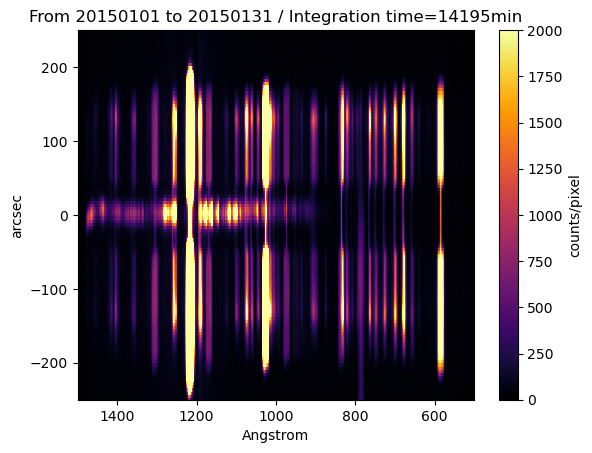

In [17]:
import numpy as np
import matplotlib.pyplot as plt  # import pyplot module

# read data
t_integ = 0
for proc_date in date_list:
    fname = get_fname('jupiter', proc_date, lv='l2p',
                      vr=fits_ver, fullpath=True)
    hdul = fitsopen(fname)

    if t_integ==0:
        # get labels from the first fits file
        x_axis = get_xaxis(hdul, ext=1)
        y_axis = get_yaxis(hdul, ext=1)
        x_label, y_label, BUNITS = get_labels(hdul, ext=1)
        # set empty image array
        NAXIS1 = int(hdul[1].header['NAXIS1'])
        NAXIS2 = int(hdul[1].header['NAXIS2'])
        img_integ = np.empty((NAXIS1, NAXIS2))

    img = get_img(hdul, ext=1)
    img_integ = np.add(img_integ, img)

    INT_TIME = int(hdul[1].header['INT_TIME'])
    t_integ += INT_TIME

    hdul.close()

mesh = plt.pcolormesh(x_axis, y_axis, img_integ,
                      cmap='inferno', vmin=0.0, vmax=2000.0)
plt.colorbar(mesh, label=BUNITS)
plt.xlim(1500.0, 500.0)  # set xrange (in wavelength)
plt.ylim(-250.0, 250.0)  # set yrange (in bin num)
plt.xlabel(x_label)
plt.ylabel(y_label)

label = 'From '+date_list[0]+' to '+date_list[-1] + \
    ' / Integration time='+str(t_integ)+'min'
plt.title(label)
